# MNIST

This notebook shows how to use the function `pymde.preserve_neighbors` to produce embeddings that highlight the local structure of your data, using MNIST as a case study. In these embeddings similar digits are near each other, and dissimilar digits are not near each other.

It also shows how to debug embeddings and search for outliers in your original data, using PyMDE.

In [1]:
import pymde

In [2]:
mnist = pymde.datasets.MNIST()

Apr 03 10:22:55 PM: Loading cached dataset.


## Embeddings, in one line

Apr 03 10:23:03 PM: Computing 15-nearest neighbors, with max_distance=None
Sat Apr  3 22:23:11 2021 Building RP forest with 21 trees
Sat Apr  3 22:23:14 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations
Apr 03 10:23:28 PM: Computing quadratic initialization.
Apr 03 10:23:32 PM: Fitting a centered embedding into R^3, for a graph with 70000 items and 1552455 edges.
Apr 03 10:23:32 PM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Apr 03 10:23:33 PM: iteration 000 | distortion 0.215608 | residual norm 0.00209202 | step length 285.687 | percent change 0.130421
Apr 03 10:23:33 PM: iteration 030 | distortion 0.123068 | residual norm 0.000201298 | step length 1 | percent change 0.694743
Apr 03 10:23:34 PM: iteration 060 | distortion 0.119776 | residual norm 7.01889e-05 | step length 1 | percent change 0.766297
Apr 03 10:23:34 PM: iteration 090 | distortion 0.119164 | residual norm 3.76974e

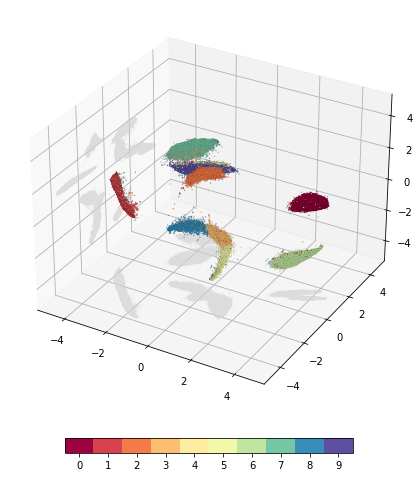

In [3]:
embedding = pymde.preserve_neighbors(mnist.data, embedding_dim=3, device='cuda', verbose=True).embed(verbose=True)

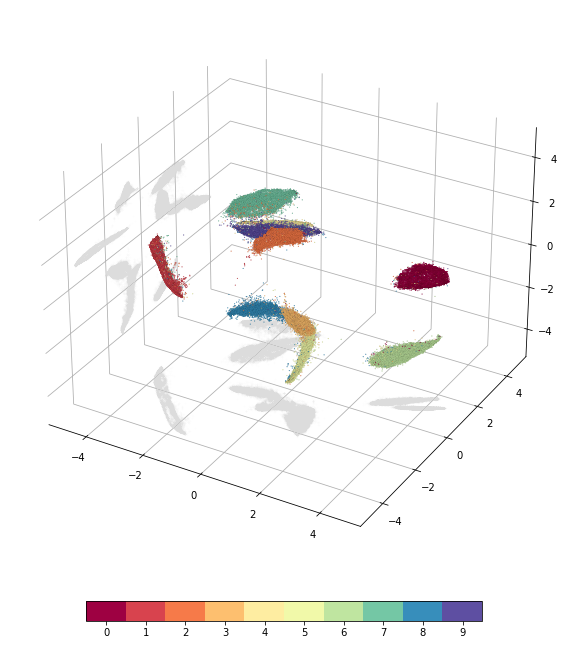

In [16]:
import matplotlib.pyplot as plt
import matplotlib

ax = pymde.plot(embedding, figsize_inches=(11, 11), color_by=mnist.attributes['digits'])
ax.xaxis.set_pane_color(matplotlib.colors.to_rgba('w'))
ax.yaxis.set_pane_color(matplotlib.colors.to_rgba('w'))
ax.xaxis.set_pane_color(matplotlib.colors.to_rgba('w'))
plt.savefig('/home/akshay/src/cvxgrp/pymde/docs_src/source/files/mnist_3d.png', transparent=True)

Mar 25 09:18:38 AM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 1164409 edges.
Mar 25 09:18:38 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:18:38 AM: iteration 000 | distortion 0.201501 | residual norm 0.00390882 | step length 5.505 | percent change 0.00575095
Mar 25 09:18:41 AM: iteration 030 | distortion 0.149273 | residual norm 0.00019365 | step length 1 | percent change 0.845017
Mar 25 09:18:44 AM: iteration 060 | distortion 0.146250 | residual norm 0.000135196 | step length 1 | percent change 1.03517
Mar 25 09:18:47 AM: iteration 090 | distortion 0.144895 | residual norm 0.00011394 | step length 1 | percent change 0.96422
Mar 25 09:18:49 AM: iteration 120 | distortion 0.143807 | residual norm 5.97839e-05 | step length 1 | percent change 0.643358
Mar 25 09:18:52 AM: iteration 150 | distortion 0.143555 | residual norm 3.53816e-05 | step length 1 | percent change 0.132154
Mar 25 09:18:55 AM: iteration 180 | distort

<AxesSubplot:>

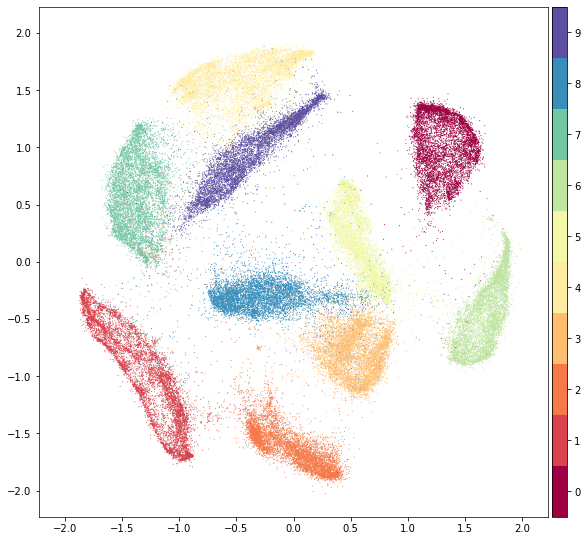

In [4]:
embedding = pymde.preserve_neighbors(mnist.data, constraint=pymde.Standardized()).embed(verbose=True)
pymde.plot(embedding, color_by=mnist.attributes['digits'])

Mar 25 09:19:10 AM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 776374 edges.
Mar 25 09:19:10 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:19:10 AM: iteration 000 | distortion 0.044722 | residual norm 3.14181e-08 | step length 1.01 | percent change 8.48083e-09
Mar 25 09:19:10 AM: Converged in 001 iterations, with residual norm 3.14181e-08
Mar 25 09:19:10 AM: Finished fitting in 0.149 seconds and 1 iterations.
Mar 25 09:19:10 AM: average distortion 0.0447 | residual norm 3.1e-08


<AxesSubplot:>

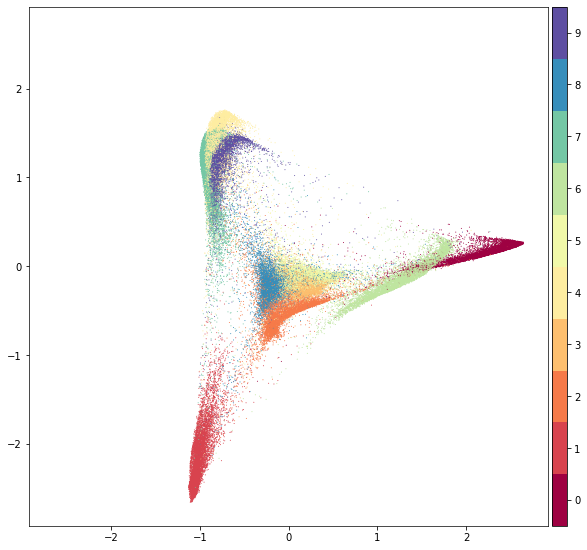

In [5]:
embedding = pymde.preserve_neighbors(mnist.data,
    attractive_penalty=pymde.penalties.Quadratic,
    repulsive_penalty=None,
).embed(verbose=True)
pymde.plot(embedding, color_by=mnist.attributes['digits'])

## Embeddings, from scratch

In [6]:
knn_graph = pymde.preprocess.k_nearest_neighbors(mnist.data, k=15, verbose=True)

Thu Mar 25 09:19:11 2021 Building RP forest with 21 trees
Thu Mar 25 09:19:13 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
	Stopping threshold met -- exiting after 4 iterations


### Quadratic MDE problems

The `embed` method computes and returns an embedding.

The embedding is also accessible via the `X` attribute of the `MDE` instance.

In [7]:
quadratic_mde = pymde.MDE(
    n_items=mnist.data.shape[0],
    embedding_dim=2,
    edges=knn_graph.edges,
    distortion_function=pymde.penalties.Quadratic(knn_graph.weights),
    constraint=pymde.Standardized())

quadratic_mde.embed(verbose=True)

Mar 25 09:19:16 AM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 776355 edges.
Mar 25 09:19:16 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:19:16 AM: iteration 000 | distortion 5.415337 | residual norm 0.0115671 | step length 25710.5 | percent change 79.4823
Mar 25 09:19:18 AM: iteration 030 | distortion 0.078528 | residual norm 0.000418566 | step length 1 | percent change 5.54125
Mar 25 09:19:19 AM: iteration 060 | distortion 0.046071 | residual norm 0.000150077 | step length 1 | percent change 2.09444
Mar 25 09:19:20 AM: iteration 090 | distortion 0.044668 | residual norm 3.39032e-05 | step length 0.484272 | percent change 0.492498
Mar 25 09:19:21 AM: Converged in 107 iterations, with residual norm 7.28709e-06
Mar 25 09:19:21 AM: Finished fitting in 4.463 seconds and 107 iterations.
Mar 25 09:19:21 AM: average distortion 0.0446 | residual norm 7.3e-06


tensor([[-0.0938,  0.2297],
        [ 1.3036,  1.8956],
        [ 1.1611, -1.4666],
        ...,
        [ 0.5786, -1.3785],
        [-0.1856,  0.0651],
        [ 0.4918,  1.4325]])

After embedding, we can call the `plot` method to visualize the embedding (when `embedding_dim` $\leq 3$).

The `color_by` keyword argument takes a length-$n$ list of attribute values associated with the items; the values are used to color the points, with each unique value getting its own color. 

Here, the attribute is the digit depicted by the image.

<AxesSubplot:>

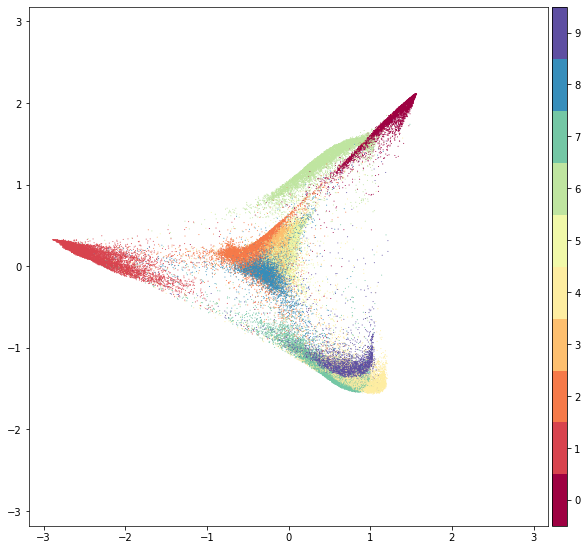

In [8]:
quadratic_mde.plot(color_by=mnist.attributes['digits'])

Next, we fit an embedding with 3 dimensions. We can visualize 3D embeddings with `PyMDE`.

Mar 25 09:19:21 AM: Fitting a standardized embedding into R^3, for a graph with 70000 items and 776355 edges.
Mar 25 09:19:21 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:19:21 AM: iteration 000 | distortion 8.115862 | residual norm 0.0141829 | step length 16915.4 | percent change 52.3525
Mar 25 09:19:23 AM: iteration 030 | distortion 0.106676 | residual norm 0.0012888 | step length 1 | percent change 2.81342
Mar 25 09:19:24 AM: iteration 060 | distortion 0.080320 | residual norm 0.000176301 | step length 1 | percent change 5.84468
Mar 25 09:19:26 AM: iteration 090 | distortion 0.075713 | residual norm 4.91886e-05 | step length 1 | percent change 1.11688
Mar 25 09:19:27 AM: iteration 120 | distortion 0.075314 | residual norm 4.49351e-05 | step length 1 | percent change 0.608835
Mar 25 09:19:28 AM: Converged in 143 iterations, with residual norm 9.86112e-06
Mar 25 09:19:28 AM: Finished fitting in 7.350 seconds and 143 iterations.
Mar 25 09:19:28 AM:

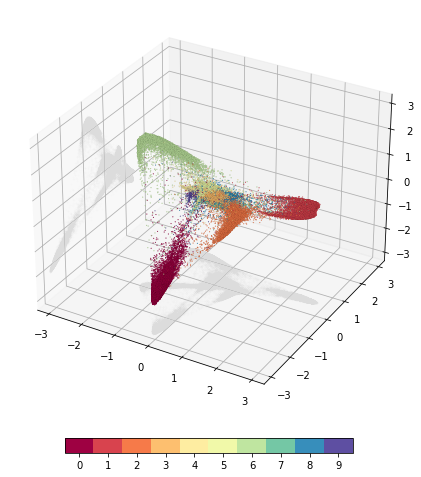

In [9]:
quadratic_mde_3d = pymde.MDE(
    n_items=mnist.data.shape[0],
    embedding_dim=3,
    edges=knn_graph.edges,
    distortion_function=pymde.penalties.Quadratic(knn_graph.weights),
    constraint=pymde.Standardized())

quadratic_mde_3d.embed(verbose=True)
quadratic_mde_3d.plot(color_by=mnist.attributes['digits'])

## Debugging the embedding

### The distribution of distortions

We can visualize the cumulative distribution of distortions. We see that a small number of pairs are responsible for most of the embedding's distortion.

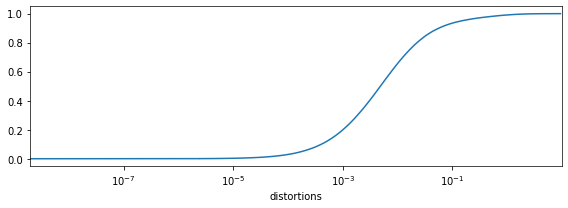

In [10]:
quadratic_mde.distortions_cdf()

### High distortion pairs

It can be instructive to inspect the pairs with highest distortion. A pair, here one column of the grid, is a set of two images that our MDE problem was told are similar. In this case, some of the high-distortion pairs are oddly drawn digits, and don't appear very similar to each other.

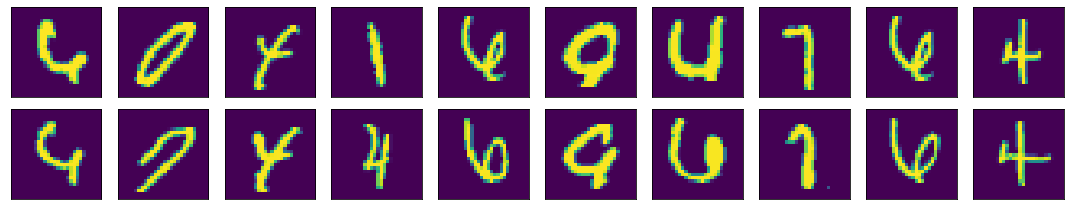

In [11]:
import matplotlib.pyplot as plt

pairs, distortions = quadratic_mde.high_distortion_pairs()
outliers = pairs[:10]

def plot_pairs(pairs):
    fig, axs = plt.subplots(2, pairs.shape[0], figsize=(15.0, 3.))
    for pair_index in range(pairs.shape[0]):
        i = pairs[pair_index][0]
        j = pairs[pair_index][1]
        im_i = mnist.data[i].reshape(28, 28)
        im_j = mnist.data[j].reshape(28, 28)
        axs[0][pair_index].imshow(im_i)
        axs[0][pair_index].set_xticks([])
        axs[0][pair_index].set_yticks([])
        axs[1][pair_index].imshow(im_j)
        axs[1][pair_index].set_xticks([])
        axs[1][pair_index].set_yticks([])
    plt.tight_layout()
    
plot_pairs(outliers)

## Low distortion pairs

In comparison, the pairs with the lowest distortion look like very reasonable pairs of images.

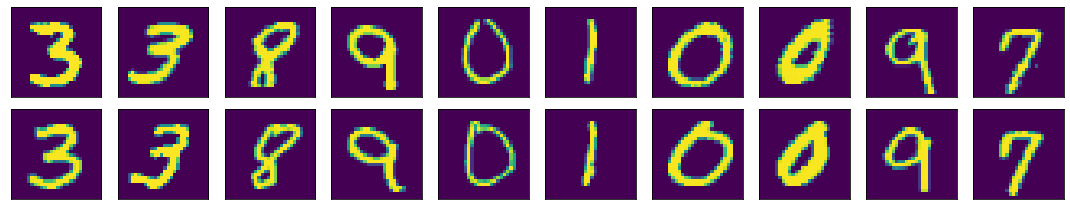

In [12]:
import matplotlib.pyplot as plt

low_distortion_pairs = pairs[-10:]
plot_pairs(low_distortion_pairs)

## Including dissimilar pairs

The quadratic MDE problem used a standardization constraint to enforce the embedding to spread out, and only used pairs of similar items.

Instead of only relying on the constraint, we can also design the distortion functions so that they discourage dissimilar items from being close. We do this by including some pairs of dissimilar items, in addition to the pairs of similar items.

### Form $\mathcal{E} = \mathcal{E}_\text{sim} \cup \mathcal{E}_\text{dis}$

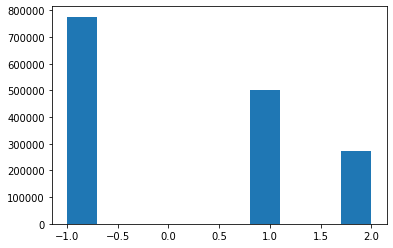

In [13]:
import torch


similar_edges = knn_graph.edges

dissimilar_edges = pymde.preprocess.dissimilar_edges(
    n_items=mnist.data.shape[0], num_edges=similar_edges.shape[0], similar_edges=similar_edges)

edges = torch.cat([similar_edges, dissimilar_edges])
weights = torch.cat([knn_graph.weights, -1.*torch.ones(dissimilar_edges.shape[0])])

plt.hist(weights.numpy())
plt.show()

### Define the distortion function $f$

In [14]:
f = pymde.penalties.PushAndPull(
    weights=weights,
    attractive_penalty=pymde.penalties.Log1p,
    repulsive_penalty=pymde.penalties.Log,
)

### A standardized embedding ...

Mar 25 09:19:32 AM: Fitting a standardized embedding into R^2, for a graph with 70000 items and 1552492 edges.
Mar 25 09:19:32 AM: `embed` method parameters: eps=1.0e-05, max_iter=400, memory_size=10
Mar 25 09:19:32 AM: iteration 000 | distortion 0.275601 | residual norm 0.00496908 | step length 1 | percent change 0.00132805
Mar 25 09:19:37 AM: iteration 040 | distortion 0.186603 | residual norm 0.00014998 | step length 1 | percent change 0.465379
Mar 25 09:19:43 AM: iteration 080 | distortion 0.184841 | residual norm 4.16384e-05 | step length 1 | percent change 0.353242
Mar 25 09:19:48 AM: iteration 120 | distortion 0.184317 | residual norm 8.31594e-05 | step length 1 | percent change 0.361048
Mar 25 09:19:53 AM: iteration 160 | distortion 0.183992 | residual norm 2.56404e-05 | step length 1 | percent change 0.103193
Mar 25 09:19:58 AM: iteration 200 | distortion 0.183931 | residual norm 1.49298e-05 | step length 1 | percent change 0.0760127
Mar 25 09:19:59 AM: Converged in 208 iterat

<AxesSubplot:>

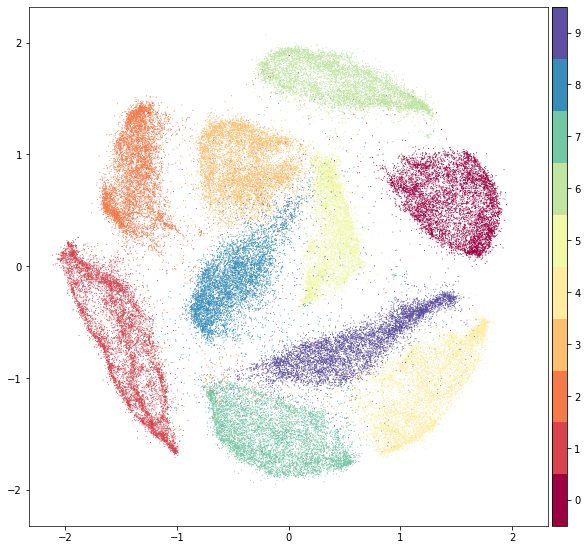

In [15]:
std_mde = pymde.MDE(
    n_items=mnist.data.shape[0],
    embedding_dim=2,
    edges=edges,
    distortion_function=f,
    constraint=pymde.Standardized(),
)
std_mde.embed(X=quadratic_mde.X, max_iter=400, verbose=True)
std_mde.plot(color_by=mnist.attributes['digits'])

## ... and an unconstrained embedding

Mar 25 09:19:59 AM: Fitting a centered embedding into R^2, for a graph with 70000 items and 1552492 edges.
Mar 25 09:19:59 AM: `embed` method parameters: eps=1.0e-05, max_iter=300, memory_size=10
Mar 25 09:20:00 AM: iteration 000 | distortion 0.275601 | residual norm 0.00499434 | step length 1 | percent change 0.0013348
Mar 25 09:20:03 AM: iteration 030 | distortion 0.133351 | residual norm 0.00030042 | step length 1 | percent change 1.42281
Mar 25 09:20:07 AM: iteration 060 | distortion 0.123726 | residual norm 0.000106339 | step length 1 | percent change 0.217715
Mar 25 09:20:11 AM: iteration 090 | distortion 0.122117 | residual norm 9.20088e-05 | step length 1 | percent change 0.10702
Mar 25 09:20:15 AM: iteration 120 | distortion 0.121621 | residual norm 4.23957e-05 | step length 1 | percent change 0.297568
Mar 25 09:20:19 AM: iteration 150 | distortion 0.121262 | residual norm 3.98624e-05 | step length 1 | percent change 0.163474
Mar 25 09:20:23 AM: iteration 180 | distortion 0.12

<AxesSubplot:>

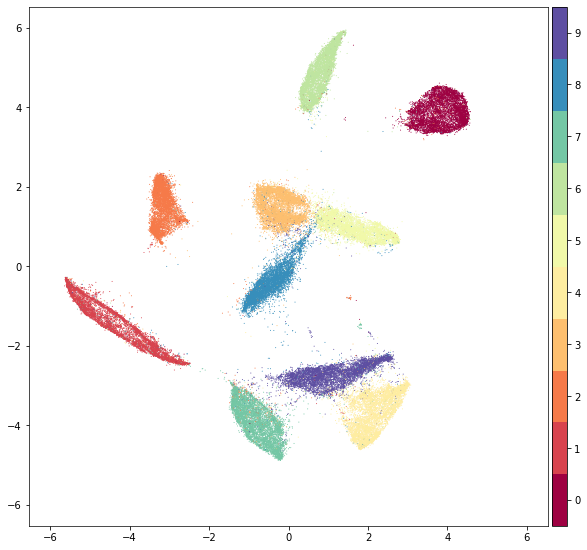

In [16]:
unconstrained_mde = pymde.MDE(
    n_items=mnist.data.shape[0],
    embedding_dim=2,
    edges=edges,
    distortion_function=f,
)
unconstrained_mde.embed(X=quadratic_mde.X, verbose=True)
unconstrained_mde.plot(color_by=mnist.attributes['digits'])